## Feature Engineering (model v2)

#### Import relevant libraries

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### Load processed dataset

In [2]:
input_dir = os.path.join('..', 'data', 'processed')
data_df = pd.read_csv(os.path.join(input_dir, 'processed_data.csv'))
data_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,generation_steam,ror,roe,pp_mwh_fossil_fuel,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,pp_mwh_renewable,energy_burden,normalized_expenditure
0,2.0,2005,375.031464,7.084629,9.540319,140.598363,24.935923,79.832394,93.020037,115.705892,...,49.987032,0.087600,0.108207,0.000000,0.000000,0.000000,0.000000,0.000000,0.024592,81.676905
1,2.0,2006,403.967434,8.175744,20.977633,150.312633,25.845165,83.786720,112.218061,136.302804,...,50.243436,0.085510,0.107000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026468,89.320532
2,2.0,2007,362.674741,9.373432,25.958163,162.860281,26.922500,86.942468,136.816315,146.322099,...,51.081573,0.085237,0.107000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027564,97.147337
3,2.0,2008,389.722554,12.139279,17.184093,161.259248,25.216835,87.957893,136.354090,157.862545,...,49.206599,0.084010,0.105000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028647,108.684700
4,2.0,2009,368.234034,10.900991,22.232564,178.909959,25.595063,94.547352,144.596841,136.960261,...,41.204845,0.083217,0.105000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029137,108.551083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.254507,0.096506,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018758,111.441490
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.349109,0.096506,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015613,106.074202
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,0.000000,0.096506,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017386,113.902374
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,0.000000,0.074800,0.098500,443435.738053,13540.946747,239069.958001,156.964302,30161.392898,0.016126,109.822755


Add unique identifier for each row

In [3]:
# Adding a unique row id based on concatenating the (respondent_id) and (year)
data_df['row_uid'] = ((data_df['respondent_id']*10000) + data_df['year']).astype(int)

**Data from 2010 to 2020 inclusive**

In [4]:
is_after_2010 = data_df['year'] >= 2010  #inclusive
data_after_2010_df = data_df[is_after_2010].reset_index(drop=True).copy()
data_after_2010_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,ror,roe,pp_mwh_fossil_fuel,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,pp_mwh_renewable,energy_burden,normalized_expenditure,row_uid
0,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,0.083400,0.105000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033783,111.838989,22010
1,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,0.083267,0.104333,0.000000,0.000000,0.000000,0.000000,0.000000,0.031261,114.943218,22011
2,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,0.082200,0.103250,0.000000,0.000000,0.000000,0.000000,0.000000,0.029887,117.445000,22012
3,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,0.081400,0.102500,0.000000,0.000000,0.000000,0.000000,0.000000,0.028994,115.989436,22013
4,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,0.079250,0.101400,0.000000,0.000000,0.000000,0.000000,0.000000,0.030413,117.954902,22014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.096506,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018758,111.441490,4282016
1305,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.096506,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015613,106.074202,4282017
1306,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,0.096506,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017386,113.902374,4282018
1307,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,0.074800,0.098500,443435.738053,13540.946747,239069.958001,156.964302,30161.392898,0.016126,109.822755,4282019


In [5]:
data_after_2010_df.columns

Index(['respondent_id', 'year', 'bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission', 'expenditure_gas',
       'expenditure_other fuel', 'expenditure_adjustment',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission', 'housing_units',
       'income', 'asset_value_distribution', 'asset_value_hydro',
       'asset_value_nuclear', 'asset_value_other', 'asset_value_other_fossil',
       'asset_value_renewables', 'asset_value_steam',
       'asset_value_transmission', 'earnings_value_distribution',
       'earnings_value_hydro', 'earnings_value_nuclear',
       'earnings_value_other', 'earnings_value_other_fossil',

**Data from 2010 to 2018 inclusive**

Used because the target variable (see below) is constrained to this timeframe.

In [6]:
start_year = 2010; end_year = 2018;
filter_2010_to_2018 = (data_df['year'] >= start_year) & (data_df['year'] <= end_year)
processed_df = data_df[filter_2010_to_2018].reset_index(drop=True).copy()
processed_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,ror,roe,pp_mwh_fossil_fuel,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,pp_mwh_renewable,energy_burden,normalized_expenditure,row_uid
0,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,0.083400,0.105000,0.0,0.0,0.0,0.0,0.0,0.033783,111.838989,22010
1,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,0.083267,0.104333,0.0,0.0,0.0,0.0,0.0,0.031261,114.943218,22011
2,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,0.082200,0.103250,0.0,0.0,0.0,0.0,0.0,0.029887,117.445000,22012
3,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,0.081400,0.102500,0.0,0.0,0.0,0.0,0.0,0.028994,115.989436,22013
4,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,0.079250,0.101400,0.0,0.0,0.0,0.0,0.0,0.030413,117.954902,22014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,428.0,2014,158.113482,555.291597,-126.117586,203.376168,0.000000,0.000000,197.721946,0.000000,...,0.096506,0.119000,0.0,0.0,0.0,0.0,0.0,0.022694,128.591665,4282014
1067,428.0,2015,143.199850,384.308423,-112.101241,201.287076,0.000000,0.000000,194.074933,0.000000,...,0.096506,0.119000,0.0,0.0,0.0,0.0,0.0,0.019192,117.336134,4282015
1068,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.096506,0.119000,0.0,0.0,0.0,0.0,0.0,0.018758,111.441490,4282016
1069,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.096506,0.119000,0.0,0.0,0.0,0.0,0.0,0.015613,106.074202,4282017


#### Create target variable
9-year timeframe: 2010 to 2018 (because calculating average change in residential price in a 3-year timeframe), and this is building in delayed impact.

Average change in expenditure for 2012, looking forward 2 years: (((exp_2013 - exp_2012)/(exp_2012)) + ((exp_2014 - exp_2013)/(exp_2013)))/2

In [7]:
# Target variable
# normalized_expenditure = data_after_2010_df.reset_index()[['respondent_id', 'year', 'normalized_expenditure']]
normalized_expenditure = processed_df[['row_uid', 'year', 'normalized_expenditure']].copy()
normalized_expenditure

,row_uid,year,normalized_expenditure
0,22010,2010,111.838989
1,22011,2011,114.943218
2,22012,2012,117.445000
3,22013,2013,115.989436
4,22014,2014,117.954902
...,...,...,...
1066,4282014,2014,128.591665
1067,4282015,2015,117.336134
1068,4282016,2016,111.441490
1069,4282017,2017,106.074202


In [8]:
# Lag (if looking behind)
# normalized_expenditure['prev_yr_exp'] = normalized_expenditure['normalized_expenditure'].shift(1, fill_value=0)
# normalized_expenditure['prev_2yrs_exp'] = normalized_expenditure['normalized_expenditure'].shift(2, fill_value=0)

# Lead (if looking forward)
normalized_expenditure['next_yr_exp'] = normalized_expenditure['normalized_expenditure'].shift(-1, fill_value=0).copy()
normalized_expenditure['next_2yrs_exp'] = normalized_expenditure['normalized_expenditure'].shift(-2, fill_value=0).copy()
normalized_expenditure.head(20)

,row_uid,year,normalized_expenditure,next_yr_exp,next_2yrs_exp
0,22010,2010,111.838989,114.943218,117.445000
1,22011,2011,114.943218,117.445000,115.989436
2,22012,2012,117.445000,115.989436,117.954902
3,22013,2013,115.989436,117.954902,122.034790
4,22014,2014,117.954902,122.034790,126.580203
5,22015,2015,122.034790,126.580203,133.721222
6,22016,2016,126.580203,133.721222,125.370902
7,22017,2017,133.721222,125.370902,106.946635
8,22018,2018,125.370902,106.946635,120.987794
9,32010,2010,106.946635,120.987794,119.292404


In [9]:
pre_2018 = (normalized_expenditure['year'] <= 2018)
normalized_expenditure = normalized_expenditure[pre_2018]
normalized_expenditure.head

<bound method NDFrame.head of       row_uid  year  normalized_expenditure  next_yr_exp  next_2yrs_exp
0       22010  2010              111.838989   114.943218     117.445000
1       22011  2011              114.943218   117.445000     115.989436
2       22012  2012              117.445000   115.989436     117.954902
3       22013  2013              115.989436   117.954902     122.034790
4       22014  2014              117.954902   122.034790     126.580203
...       ...   ...                     ...          ...            ...
1066  4282014  2014              128.591665   117.336134     111.441490
1067  4282015  2015              117.336134   111.441490     106.074202
1068  4282016  2016              111.441490   106.074202     113.902374
1069  4282017  2017              106.074202   113.902374       0.000000
1070  4282018  2018              113.902374     0.000000       0.000000

[1071 rows x 5 columns]>

In [10]:
## Target variable: 
normalized_expenditure['av_price_change'] = \
    ((normalized_expenditure['next_yr_exp'] - normalized_expenditure['normalized_expenditure'])/(normalized_expenditure['normalized_expenditure']) + \
    (normalized_expenditure['next_2yrs_exp'] - normalized_expenditure['next_yr_exp'])/(normalized_expenditure['next_yr_exp']))\
    /2
normalized_expenditure

,row_uid,year,normalized_expenditure,next_yr_exp,next_2yrs_exp,av_price_change
0,22010,2010,111.838989,114.943218,117.445000,0.024761
1,22011,2011,114.943218,117.445000,115.989436,0.004686
2,22012,2012,117.445000,115.989436,117.954902,0.002276
3,22013,2013,115.989436,117.954902,122.034790,0.025767
4,22014,2014,117.954902,122.034790,126.580203,0.035918
...,...,...,...,...,...,...
1066,4282014,2014,128.591665,117.336134,111.441490,-0.068883
1067,4282015,2015,117.336134,111.441490,106.074202,-0.049200
1068,4282016,2016,111.441490,106.074202,113.902374,0.012818
1069,4282017,2017,106.074202,113.902374,0.000000,-0.463100


In [11]:
target = normalized_expenditure['av_price_change'].reset_index(drop=True)
target

0       0.024761
1       0.004686
2       0.002276
3       0.025767
4       0.035918
          ...   
1066   -0.068883
1067   -0.049200
1068    0.012818
1069   -0.463100
1070         NaN
Name: av_price_change, Length: 1071, dtype: float64

(array([1068.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           2.]),
 array([-5.84080930e-01,  1.11128884e+03,  2.22316176e+03,  3.33503468e+03,
         4.44690760e+03,  5.55878052e+03,  6.67065343e+03,  7.78252635e+03,
         8.89439927e+03,  1.00062722e+04,  1.11181451e+04]),
 <BarContainer object of 10 artists>)

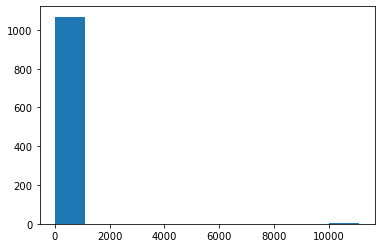

In [12]:
plt.hist(target)

(array([  5.,  25., 260., 735.,  35.,   0.,   4.,   0.,   1.,   1.]),
 array([-0.58408093, -0.3952255 , -0.20637007, -0.01751463,  0.1713408 ,
         0.36019623,  0.54905166,  0.73790709,  0.92676253,  1.11561796,
         1.30447339]),
 <BarContainer object of 10 artists>)

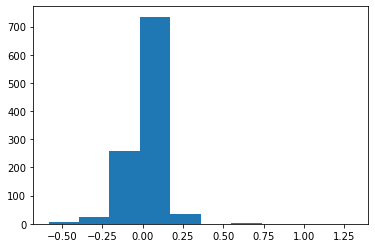

In [13]:
# Note: need to filter for target outliers (see end of file)
plt.hist(target[target<100])

#### Prepare DataFrames for Investments

In [14]:
investment_column_names = ['row_uid', 'respondent_id', 'year', 'investment_value_distribution',
       'investment_value_hydro', 'investment_value_nuclear',
       'investment_value_other', 'investment_value_other_fossil',
       'investment_value_renewables', 'investment_value_steam',
       'investment_value_transmission', 'sales']

In [15]:
investment_column_names_only = ['investment_value_distribution',
 'investment_value_hydro',
 'investment_value_nuclear',
 'investment_value_other',
 'investment_value_other_fossil',
 'investment_value_renewables',
 'investment_value_steam',
 'investment_value_transmission']
investment_column_names_only

['investment_value_distribution',
 'investment_value_hydro',
 'investment_value_nuclear',
 'investment_value_other',
 'investment_value_other_fossil',
 'investment_value_renewables',
 'investment_value_steam',
 'investment_value_transmission']

In [16]:
investments_sales_df = processed_df[investment_column_names].copy()
investments_sales_df

,row_uid,respondent_id,year,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission,sales
0,22010,2.0,2010,296011623.0,6234229.0,77733140.0,94034652.0,0.0,0.0,946788067.0,136373665.0,20417032.0
1,22011,2.0,2011,351345076.0,22852001.0,144838131.0,68096283.0,0.0,0.0,257254121.0,216313521.0,18650366.0
2,22012,2.0,2012,258338498.0,14765465.0,58458982.0,157382446.0,0.0,0.0,54826093.0,153362827.0,17612420.0
3,22013,2.0,2013,287329351.0,26477815.0,50928276.0,256594847.0,0.0,0.0,72715405.0,176758705.0,17919762.0
4,22014,2.0,2014,328096305.0,39142268.0,31874019.0,148174915.0,0.0,0.0,318747804.0,315617541.0,18726485.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,4282014,428.0,2014,5183490.0,0.0,0.0,515233.0,0.0,0.0,0.0,1885708.0,543147.0
1067,4282015,428.0,2015,5479993.0,0.0,0.0,230021.0,0.0,0.0,0.0,1684245.0,554166.0
1068,4282016,428.0,2016,4907945.0,0.0,0.0,278250.0,0.0,0.0,0.0,3297710.0,551190.0
1069,4282017,428.0,2017,9968608.0,0.0,0.0,234993.0,0.0,0.0,0.0,3240558.0,525781.0


In [17]:
investments_sales_df['sum_investments'] = investments_sales_df[investment_column_names_only].sum(axis=1)
investments_sales_df['sum_investments_generation'] = investments_sales_df['sum_investments'] - investments_sales_df['investment_value_transmission'] - investments_sales_df['investment_value_distribution']
investments_sales_df

,row_uid,respondent_id,year,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission,sales,sum_investments,sum_investments_generation
0,22010,2.0,2010,296011623.0,6234229.0,77733140.0,94034652.0,0.0,0.0,946788067.0,136373665.0,20417032.0,1.557175e+09,1.124790e+09
1,22011,2.0,2011,351345076.0,22852001.0,144838131.0,68096283.0,0.0,0.0,257254121.0,216313521.0,18650366.0,1.060699e+09,4.930405e+08
2,22012,2.0,2012,258338498.0,14765465.0,58458982.0,157382446.0,0.0,0.0,54826093.0,153362827.0,17612420.0,6.971343e+08,2.854330e+08
3,22013,2.0,2013,287329351.0,26477815.0,50928276.0,256594847.0,0.0,0.0,72715405.0,176758705.0,17919762.0,8.708044e+08,4.067163e+08
4,22014,2.0,2014,328096305.0,39142268.0,31874019.0,148174915.0,0.0,0.0,318747804.0,315617541.0,18726485.0,1.181653e+09,5.379390e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,4282014,428.0,2014,5183490.0,0.0,0.0,515233.0,0.0,0.0,0.0,1885708.0,543147.0,7.584431e+06,5.152330e+05
1067,4282015,428.0,2015,5479993.0,0.0,0.0,230021.0,0.0,0.0,0.0,1684245.0,554166.0,7.394259e+06,2.300210e+05
1068,4282016,428.0,2016,4907945.0,0.0,0.0,278250.0,0.0,0.0,0.0,3297710.0,551190.0,8.483905e+06,2.782500e+05
1069,4282017,428.0,2017,9968608.0,0.0,0.0,234993.0,0.0,0.0,0.0,3240558.0,525781.0,1.344416e+07,2.349930e+05


In [18]:
# Checking number of negative investments (excluding adjustments): 112
bill_column_names_only_no_adj = ['bill_gas', 'bill_other fuel',
       'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission']

negative_investments_df = investments_sales_df[(investments_sales_df[investment_column_names_only] < 0).any(axis=1)].copy()
negative_investments_df 

,row_uid,respondent_id,year,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission,sales,sum_investments,sum_investments_generation
18,62010,6.0,2010,125193661.0,2768747.0,0.0,-1.456733e+07,0.0,0.0,456706892.0,44940243.0,13127049.0,6.150422e+08,4.449083e+08
19,62011,6.0,2011,130112573.0,5034329.0,0.0,-4.712045e+07,0.0,0.0,500410688.0,103985745.0,12010960.0,6.924229e+08,4.583246e+08
29,72012,7.0,2012,220698450.0,0.0,58687565.0,1.724687e+08,-89922704.0,280641346.0,39955754.0,85593352.0,13256456.0,7.681225e+08,4.618307e+08
76,172014,17.0,2014,242406139.0,-1947675.0,112840858.0,1.852086e+09,0.0,0.0,213949074.0,114662543.0,18232019.0,2.533997e+09,2.176928e+09
108,272010,27.0,2010,93289187.0,0.0,0.0,5.600801e+07,0.0,0.0,-267748117.0,5850693.0,7640842.0,-1.126002e+08,-2.117401e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2812013,281.0,2013,126192335.0,0.0,0.0,1.529457e+07,-7119200.0,10264556.0,123205800.0,0.0,4271627.0,2.678381e+08,1.416457e+08
1041,2882016,288.0,2016,18696447.0,0.0,0.0,7.049909e+06,-15811033.0,18908544.0,0.0,7039074.0,852454.0,3.588294e+07,1.014742e+07
1043,2882018,288.0,2018,30382924.0,0.0,0.0,4.422791e+06,-113532.0,1285323.0,0.0,6156475.0,903742.0,4.213398e+07,5.594582e+06
1053,4032010,403.0,2010,8033901.0,0.0,0.0,-4.011700e+04,0.0,0.0,1999400.0,-332086.0,261607.0,9.661098e+06,1.959283e+06


#### Prepare DataFrames for Expenditures

In [19]:
expenditure_column_names = ['row_uid', 'respondent_id', 'year', 'expenditure_gas',
       'expenditure_other fuel', 'expenditure_adjustment',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission']

In [20]:
expenditures_df = processed_df[expenditure_column_names].copy()
expenditures_df

,row_uid,respondent_id,year,expenditure_gas,expenditure_other fuel,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission
0,22010,2.0,2010,6.080564e+08,2.002633e+07,8.956252e+07,3.248530e+08,4.579505e+07,1.694905e+08,2.297408e+08,2.299294e+08,1.265088e+08,0.0,9.120914e+08,1.554485e+08
1,22011,2.0,2011,5.032305e+08,1.540458e+07,1.030160e+08,3.099838e+08,4.502904e+07,1.663728e+08,1.923894e+08,2.075588e+08,1.112800e+08,0.0,8.575845e+08,1.505196e+08
2,22012,2.0,2012,4.094341e+08,1.088067e+07,1.004088e+08,3.040825e+08,4.443907e+07,1.825707e+08,2.134245e+08,1.757379e+08,1.026648e+08,0.0,7.943939e+08,1.507688e+08
3,22013,2.0,2013,4.986984e+08,1.238707e+07,7.466188e+07,3.095634e+08,4.409042e+07,1.837882e+08,2.172177e+08,1.876388e+08,8.917199e+07,0.0,8.191430e+08,1.532276e+08
4,22014,2.0,2014,5.264963e+08,1.464226e+07,3.740197e+07,3.262710e+08,4.810755e+07,1.918255e+08,2.355937e+08,2.017962e+08,1.505080e+08,0.0,8.451021e+08,1.722740e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,4282014,428.0,2014,1.094781e+07,4.082092e+07,-8.957539e+06,1.444485e+07,0.000000e+00,0.000000e+00,1.404326e+07,0.000000e+00,4.249500e+07,0.0,0.000000e+00,7.818629e+06
1067,4282015,428.0,2015,9.897865e+06,2.820214e+07,-7.948111e+06,1.427149e+07,0.000000e+00,0.000000e+00,1.376014e+07,0.000000e+00,3.707793e+07,0.0,0.000000e+00,7.862245e+06
1068,4282016,428.0,2016,8.508476e+06,2.201037e+07,-8.447606e+06,1.470672e+07,0.000000e+00,0.000000e+00,1.299130e+07,0.000000e+00,3.410134e+07,0.0,0.000000e+00,8.073650e+06
1069,4282017,428.0,2017,1.020631e+07,2.426669e+07,-1.218458e+07,1.496933e+07,0.000000e+00,0.000000e+00,1.506321e+07,0.000000e+00,2.981970e+07,0.0,0.000000e+00,8.104139e+06


In [21]:
expenditure_column_names_only = ['expenditure_gas',
       'expenditure_other fuel', 'expenditure_adjustment',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission']
expenditure_column_names_only

['expenditure_gas',
 'expenditure_other fuel',
 'expenditure_adjustment',
 'expenditure_distribution',
 'expenditure_hydro',
 'expenditure_nuclear',
 'expenditure_other',
 'expenditure_other_fossil',
 'expenditure_purchased_power',
 'expenditure_renewables',
 'expenditure_steam',
 'expenditure_transmission']

In [22]:
expenditures_df['sum_expenditures'] = expenditures_df[expenditure_column_names_only].sum(axis=1)
expenditures_df['sum_expenditures_generation'] = expenditures_df['sum_expenditures'] - expenditures_df['expenditure_transmission'] - expenditures_df['expenditure_distribution']
expenditures_df

,row_uid,respondent_id,year,expenditure_gas,expenditure_other fuel,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission,sum_expenditures,sum_expenditures_generation
0,22010,2.0,2010,6.080564e+08,2.002633e+07,8.956252e+07,3.248530e+08,4.579505e+07,1.694905e+08,2.297408e+08,2.299294e+08,1.265088e+08,0.0,9.120914e+08,1.554485e+08,2.911503e+09,2.431201e+09
1,22011,2.0,2011,5.032305e+08,1.540458e+07,1.030160e+08,3.099838e+08,4.502904e+07,1.663728e+08,1.923894e+08,2.075588e+08,1.112800e+08,0.0,8.575845e+08,1.505196e+08,2.662369e+09,2.201866e+09
2,22012,2.0,2012,4.094341e+08,1.088067e+07,1.004088e+08,3.040825e+08,4.443907e+07,1.825707e+08,2.134245e+08,1.757379e+08,1.026648e+08,0.0,7.943939e+08,1.507688e+08,2.488806e+09,2.033954e+09
3,22013,2.0,2013,4.986984e+08,1.238707e+07,7.466188e+07,3.095634e+08,4.409042e+07,1.837882e+08,2.172177e+08,1.876388e+08,8.917199e+07,0.0,8.191430e+08,1.532276e+08,2.589588e+09,2.126797e+09
4,22014,2.0,2014,5.264963e+08,1.464226e+07,3.740197e+07,3.262710e+08,4.810755e+07,1.918255e+08,2.355937e+08,2.017962e+08,1.505080e+08,0.0,8.451021e+08,1.722740e+08,2.750019e+09,2.251474e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,4282014,428.0,2014,1.094781e+07,4.082092e+07,-8.957539e+06,1.444485e+07,0.000000e+00,0.000000e+00,1.404326e+07,0.000000e+00,4.249500e+07,0.0,0.000000e+00,7.818629e+06,1.216129e+08,9.934945e+07
1067,4282015,428.0,2015,9.897865e+06,2.820214e+07,-7.948111e+06,1.427149e+07,0.000000e+00,0.000000e+00,1.376014e+07,0.000000e+00,3.707793e+07,0.0,0.000000e+00,7.862245e+06,1.031237e+08,8.098997e+07
1068,4282016,428.0,2016,8.508476e+06,2.201037e+07,-8.447606e+06,1.470672e+07,0.000000e+00,0.000000e+00,1.299130e+07,0.000000e+00,3.410134e+07,0.0,0.000000e+00,8.073650e+06,9.194424e+07,6.916387e+07
1069,4282017,428.0,2017,1.020631e+07,2.426669e+07,-1.218458e+07,1.496933e+07,0.000000e+00,0.000000e+00,1.506321e+07,0.000000e+00,2.981970e+07,0.0,0.000000e+00,8.104139e+06,9.024480e+07,6.717133e+07


In [23]:
# Checking number of negative expenditures (excluding adjustments): 112
expenditure_column_names_only_no_adj = ['expenditure_gas',
       'expenditure_other fuel',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission']

negative_expenditures_df = expenditures_df[(expenditures_df[expenditure_column_names_only_no_adj] < 0).any(axis=1)].copy()
negative_expenditures_df                                  

,row_uid,respondent_id,year,expenditure_gas,expenditure_other fuel,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission,sum_expenditures,sum_expenditures_generation
27,72010,7.0,2010,3.059964e+08,7.520627e+06,-8.917323e+07,2.969494e+08,-656361.166039,2.477767e+08,1.683575e+08,3.637799e+08,1.513379e+08,9.818652e+05,2.419519e+08,1.227315e+08,1.817554e+09,1.397873e+09
29,72012,7.0,2012,2.832461e+08,5.449716e+06,-2.618874e+07,3.257377e+08,-216221.244213,2.388817e+08,1.644689e+08,3.444801e+08,1.178087e+08,2.765325e+07,2.502572e+08,1.425134e+08,1.874092e+09,1.405841e+09
30,72013,7.0,2013,2.880656e+08,6.927769e+06,-5.198534e+06,3.250822e+08,-432115.479422,2.360869e+08,1.486872e+08,3.158942e+08,1.981407e+08,4.251518e+07,2.676847e+08,1.443726e+08,1.967826e+09,1.498372e+09
31,72014,7.0,2014,2.946606e+08,8.202562e+06,-3.755960e+07,3.189370e+08,-418391.710850,2.314803e+08,1.486720e+08,3.001878e+08,2.004751e+08,4.703153e+07,2.871221e+08,1.439062e+08,1.942697e+09,1.479854e+09
32,72015,7.0,2015,3.150319e+08,5.597866e+06,-3.133943e+07,3.404872e+08,-216781.284354,2.409064e+08,1.605410e+08,2.992839e+08,2.015329e+08,5.199629e+07,2.744516e+08,1.643250e+08,2.022598e+09,1.517786e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,2102018,210.0,2018,4.822821e+08,1.304565e+07,-4.569804e+07,1.068607e+08,89347.452801,4.332253e+07,3.454214e+07,-2.508804e+06,4.450933e+07,2.430997e+08,1.924574e+08,7.924463e+07,1.191247e+09,1.005141e+09
1053,4032010,403.0,2010,3.144115e+07,2.147731e+06,-1.958948e+06,2.563183e+06,0.000000,0.000000e+00,3.438408e+06,-4.233694e+03,1.576606e+07,0.000000e+00,6.782389e+06,1.551138e+06,6.172688e+07,5.761256e+07
1054,4032011,403.0,2011,3.257916e+07,2.655687e+06,-3.136699e+06,4.144904e+06,0.000000,0.000000e+00,2.151949e+06,-5.040889e+03,1.367487e+07,0.000000e+00,9.675704e+06,2.257214e+06,6.399774e+07,5.759563e+07
1055,4032012,403.0,2012,2.734315e+07,1.879072e+06,-2.650821e+06,4.638404e+06,0.000000,0.000000e+00,2.074731e+06,-5.149473e+03,1.322632e+07,0.000000e+00,9.845050e+06,3.265966e+06,5.961672e+07,5.171235e+07


#### Prepare DataFrames for Generation Mix

In [24]:
gen_column_names = ['row_uid',
                    'respondent_id',
                    'year',
                    'generation_ee_dr', 
                    'generation_hydro', 
                    'generation_nuclear', 
                    'generation_other_fossil', 
                    'generation_steam', 
                    'generation_purchased_power', 
                    'generation_renewables_and_storage']

In [25]:
gen_mwh_df = processed_df[gen_column_names].copy()
gen_mwh_df

,row_uid,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage
0,22010,2.0,2010,0.595833,3.707895,13.169684,10.337048,44.022450,4.793492,0.0
1,22011,2.0,2011,0.049948,3.038090,14.431250,10.666586,39.396937,4.675221,0.0
2,22012,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0
3,22013,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0
4,22014,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0
...,...,...,...,...,...,...,...,...,...,...
1066,4282014,428.0,2014,0.000000,0.000000,0.000000,0.000016,0.356748,0.836826,0.0
1067,4282015,428.0,2015,0.000000,0.000000,0.000000,0.000003,0.339950,0.822487,0.0
1068,4282016,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0
1069,4282017,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0


In [26]:
# filter purchased power for time period and groupby utility
pp_column_names = ['pp_mwh_fossil_fuel',
                   'pp_mwh_renewable',
                   'pp_mwh_hydro',
                   'pp_mwh_nuclear',
                   'pp_mwh_other']

pp_mwh_df = processed_df[['row_uid'] + pp_column_names]
pp_mwh_df['row_subtotal'] = pp_mwh_df.drop(columns=['row_uid']).sum(axis=1)
pp_mwh_df

/tmp/ipykernel_47602/4197978027.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_mwh_df['row_subtotal'] = pp_mwh_df.drop(columns=['row_uid']).sum(axis=1)


,row_uid,pp_mwh_fossil_fuel,pp_mwh_renewable,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,row_subtotal
0,22010,0.0,0.0,0.0,0.0,0.0,0.0
1,22011,0.0,0.0,0.0,0.0,0.0,0.0
2,22012,0.0,0.0,0.0,0.0,0.0,0.0
3,22013,0.0,0.0,0.0,0.0,0.0,0.0
4,22014,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1066,4282014,0.0,0.0,0.0,0.0,0.0,0.0
1067,4282015,0.0,0.0,0.0,0.0,0.0,0.0
1068,4282016,0.0,0.0,0.0,0.0,0.0,0.0
1069,4282017,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
for col in pp_mwh_df:
    if col.startswith('pp'):
        name = 'pct_' + col[7:]
        pp_mwh_df[name] = np.where(pp_mwh_df['row_subtotal'] > 0,
                                   pp_mwh_df[col] / pp_mwh_df['row_subtotal'], 0)
pp_mwh_df = pp_mwh_df[[col for col in pp_mwh_df.columns if col.startswith('pct')]]
pp_mwh_df

/tmp/ipykernel_47602/823721623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_mwh_df[name] = np.where(pp_mwh_df['row_subtotal'] > 0,


,pct_fossil_fuel,pct_renewable,pct_hydro,pct_nuclear,pct_other
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1066,0.0,0.0,0.0,0.0,0.0
1067,0.0,0.0,0.0,0.0,0.0
1068,0.0,0.0,0.0,0.0,0.0
1069,0.0,0.0,0.0,0.0,0.0


In [28]:
# TODO: reallocate purchased power to generation
gen_mwh_df['pp_mwh_fossil_fuel'] = 0 #gen_mwh_df['generation_purchased_power']*pp_mwh_df['pct_fossil_fuel']
gen_mwh_df['pp_mwh_renewable'] = 0 #gen_mwh_df['generation_purchased_power']*pp_mwh_df['pct_renewable']
gen_mwh_df['pp_mwh_hydro'] = 0 #gen_mwh_df['generation_purchased_power']*pp_mwh_df['pct_hydro']
gen_mwh_df['pp_mwh_nuclear'] = 0 #gen_mwh_df['generation_purchased_power']*pp_mwh_df['pct_nuclear']
gen_mwh_df['pp_mwh_other'] = 0 #gen_mwh_df['generation_purchased_power']*pp_mwh_df['pct_other']

In [29]:
# sub totals
gen_column_names_only = [col for col in gen_mwh_df if col.startswith('generation')]
gen_mwh_df['sum_total_generation'] = gen_mwh_df[gen_column_names_only].sum(axis=1)

In [30]:
gen_mwh_df['sum_generation_wo_purchased'] = gen_mwh_df.drop(['respondent_id', 
                                                             'year', 
                                                             'sum_total_generation', 
                                                             'generation_purchased_power'
                                                            ], axis=1).sum(axis=1)

In [31]:
gen_mwh_df['sum_fossil_generation'] = gen_mwh_df['generation_steam'] +\
                                      gen_mwh_df['generation_other_fossil'] +\
                                      gen_mwh_df['pp_mwh_fossil_fuel']

In [32]:
gen_mwh_df['sum_clean_generation'] = gen_mwh_df['generation_hydro'] + gen_mwh_df['pp_mwh_hydro'] \
                                     + gen_mwh_df['generation_nuclear'] + gen_mwh_df['pp_mwh_nuclear'] \
                                     + gen_mwh_df['generation_renewables_and_storage'] + gen_mwh_df['pp_mwh_renewable']

In [33]:
# Checking number of negative `generation_renewables_and_storage`: 5
gen_mwh_df[gen_mwh_df['generation_renewables_and_storage'] < 0]

,row_uid,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,pp_mwh_fossil_fuel,pp_mwh_renewable,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,sum_total_generation,sum_generation_wo_purchased,sum_fossil_generation,sum_clean_generation
26,62018,6.0,2018,0.354175,0.756353,0.0,4.385579,19.258285,12.407175,-0.000210,0,0,0,0,0,37.161357,6.204275e+04,23.643864,0.756143
114,272016,27.0,2016,0.790893,0.000000,0.0,0.000119,5.498224,6.172428,-0.053992,0,0,0,0,0,12.407672,2.720222e+05,5.498343,-0.053992
115,272017,27.0,2017,0.947813,0.000000,0.0,0.000000,0.000000,5.475918,-0.001191,0,0,0,0,0,6.422540,2.720179e+05,0.000000,-0.001191
116,272018,27.0,2018,1.071826,0.000000,0.0,0.000000,0.000000,5.449337,-0.001285,0,0,0,0,0,6.519878,2.720191e+05,0.000000,-0.001285
611,1272018,127.0,2018,0.000000,0.000000,0.0,0.000000,0.000000,15.894138,-0.001278,0,0,0,0,0,15.892860,1.272018e+06,0.000000,-0.001278


In [34]:
# Checking number of rows with any negative generation: 66
negative_generation_df = gen_mwh_df[(gen_mwh_df[gen_column_names_only] < 0).any(axis=1)].copy()
negative_generation_df                                  

,row_uid,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,pp_mwh_fossil_fuel,pp_mwh_renewable,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,sum_total_generation,sum_generation_wo_purchased,sum_fossil_generation,sum_clean_generation
9,32010,3.0,2010,0.072341,0.399573,0.000000,-0.000025,0.000000,0.278410,0.000000,0,0,0,0,0,0.750299,3.201047e+04,-0.000025,0.399573
16,32017,3.0,2017,0.000000,0.128207,0.000000,-0.000992,0.000000,0.302805,0.000000,0,0,0,0,0,0.430020,3.201713e+04,-0.000992,0.128207
17,32018,3.0,2018,0.000000,0.136700,0.000000,-0.000646,0.000000,0.271555,0.000000,0,0,0,0,0,0.407609,3.201814e+04,-0.000646,0.136700
26,62018,6.0,2018,0.354175,0.756353,0.000000,4.385579,19.258285,12.407175,-0.000210,0,0,0,0,0,37.161357,6.204275e+04,23.643864,0.756143
114,272016,27.0,2016,0.790893,0.000000,0.000000,0.000119,5.498224,6.172428,-0.053992,0,0,0,0,0,12.407672,2.720222e+05,5.498343,-0.053992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,1812013,181.0,2013,0.000000,0.076071,0.000000,-0.000050,0.000000,0.806061,0.000000,0,0,0,0,0,0.882082,1.812013e+06,-0.000050,0.076071
937,1862011,186.0,2011,0.288162,-0.197526,24.095849,10.142287,22.002648,28.276392,0.392781,0,0,0,0,0,85.000594,1.862068e+06,32.144936,24.291104
938,1862012,186.0,2012,0.312462,-0.240765,26.883407,14.605209,18.310065,22.633479,0.340830,0,0,0,0,0,82.844687,1.862072e+06,32.915274,26.983472
943,1862017,186.0,2017,0.626065,-0.066711,28.683108,28.065810,15.716967,12.077869,1.101817,0,0,0,0,0,86.204925,1.862091e+06,43.782777,29.718214


#### Prepare DataFrames for Bills

In [35]:
bill_column_names = ['row_uid','respondent_id', 'year', 'bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission']

In [36]:
sum_bills_df = processed_df[bill_column_names].copy()
sum_bills_df

,row_uid,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,bill_purchased_power,bill_renewables,bill_steam,bill_transmission
0,22010,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,80.946118,0.0,583.597747,99.463021
1,22011,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,71.211382,0.0,548.793926,96.321952
2,22012,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,65.395517,0.0,506.013642,96.036797
3,22013,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,56.605652,0.0,519.985275,97.267614
4,22014,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,95.153379,0.0,534.285890,108.914163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,4282014,428.0,2014,158.113482,555.291597,-126.117586,203.376168,0.000000,0.000000,197.721946,0.000000,598.307931,0.0,0.000000,110.082314
1067,4282015,428.0,2015,143.199850,384.308423,-112.101241,201.287076,0.000000,0.000000,194.074933,0.000000,522.952149,0.0,0.000000,110.890173
1068,4282016,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,471.798696,0.0,0.000000,111.700542
1069,4282017,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,411.705696,0.0,0.000000,111.889786


In [37]:
bill_column_names = ['bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission']
bill_column_names

['bill_gas',
 'bill_other fuel',
 'bill_adjustment',
 'bill_distribution',
 'bill_hydro',
 'bill_nuclear',
 'bill_other',
 'bill_other_fossil',
 'bill_purchased_power',
 'bill_renewables',
 'bill_steam',
 'bill_transmission']

In [38]:
sum_bills_df['sum_bills'] = sum_bills_df[bill_column_names].sum(axis=1)
sum_bills_df

,row_uid,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,bill_purchased_power,bill_renewables,bill_steam,bill_transmission,sum_bills
0,22010,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,80.946118,0.0,583.597747,99.463021,1850.281734
1,22011,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,71.211382,0.0,548.793926,96.321952,1693.232933
2,22012,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,65.395517,0.0,506.013642,96.036797,1576.761864
3,22013,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,56.605652,0.0,519.985275,97.267614,1633.429083
4,22014,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,95.153379,0.0,534.285890,108.914163,1727.700490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,4282014,428.0,2014,158.113482,555.291597,-126.117586,203.376168,0.000000,0.000000,197.721946,0.000000,598.307931,0.0,0.000000,110.082314,1696.775852
1067,4282015,428.0,2015,143.199850,384.308423,-112.101241,201.287076,0.000000,0.000000,194.074933,0.000000,522.952149,0.0,0.000000,110.890173,1444.611362
1068,4282016,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,471.798696,0.0,0.000000,111.700542,1264.798185
1069,4282017,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,411.705696,0.0,0.000000,111.889786,1238.261751


In [39]:
# Checking number of negative bills (excluding adjustments): 112
bill_column_names_only_no_adj = ['bill_gas', 'bill_other fuel',
       'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission']

negative_bills_df = sum_bills_df[(sum_bills_df[bill_column_names_only_no_adj] < 0).any(axis=1)].copy()
negative_bills_df                                

,row_uid,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,bill_purchased_power,bill_renewables,bill_steam,bill_transmission,sum_bills
27,72010,7.0,2010,224.273198,6.159276,-69.079799,230.037684,-0.508463,191.945082,130.421446,281.809222,117.236889,0.760621,187.432800,95.076341,1395.564297
29,72012,7.0,2012,205.811772,4.424812,-20.112978,250.166912,-0.166058,183.461406,126.312321,264.561042,90.477199,21.237724,192.197807,109.450417,1427.822374
30,72013,7.0,2013,206.394005,5.546432,-3.936789,246.180905,-0.327236,178.785875,112.599046,239.222971,150.049630,32.196250,202.714482,109.331693,1478.757264
31,72014,7.0,2014,208.170914,6.475334,-28.046229,238.154344,-0.312418,172.849278,111.015274,224.154025,149.697341,35.119042,214.397733,107.456579,1439.131217
32,72015,7.0,2015,219.743830,4.363142,-23.105154,251.025890,-0.159823,177.609467,118.359639,220.648571,148.581112,38.334526,202.340800,121.149407,1478.891408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,2102018,210.0,2018,529.172111,14.943833,-51.761450,121.039390,0.101202,49.070756,39.125341,-2.841683,50.415021,275.355222,217.993505,89.759156,1332.372404
1053,4032010,403.0,2010,648.611921,37.061643,-40.468955,52.951543,0.000000,0.000000,71.032397,-0.087462,325.703443,0.000000,140.114079,32.044207,1266.962816
1054,4032011,403.0,2011,680.062546,46.370758,-65.568376,86.643503,0.000000,0.000000,44.983525,-0.105373,285.854276,0.000000,202.257248,47.183943,1327.682049
1055,4032012,403.0,2012,565.651170,32.516347,-54.915257,96.090666,0.000000,0.000000,42.980787,-0.106678,274.000704,0.000000,203.953216,67.658799,1227.829754


In [40]:
# Looks like the negative rows for expenditures are the same as those for bills
negative_expenditures_df[~negative_expenditures_df.isin(negative_bills_df)].dropna()

,row_uid,respondent_id,year,expenditure_gas,expenditure_other fuel,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission,sum_expenditures,sum_expenditures_generation


#### Prepare DataFrame for Utility Info

In [41]:
utility_info_df = processed_df[['respondent_id', 'utype', 'roe']].groupby(by=['respondent_id']).first().reset_index()
utility_info_df.head(10)

,respondent_id,utype,roe
0,2.0,vert_int,0.105000
1,3.0,vert_int,0.128800
2,6.0,vert_int,0.103387
3,7.0,vert_int,0.110000
4,8.0,vert_int,0.099000
5,9.0,other_wires,0.097500
6,10.0,other_wires,0.098600
7,11.0,restructured,0.102000
8,17.0,vert_int,0.101837
9,19.0,restructured,0.100000


#### Create feature variables

__x01__: % of investments that go to transmission and distribution

(array([  3., 120., 701., 244.,   1.,   0.,   0.,   0.,   0.,   2.]),
 array([-0.88045896, -0.28749566,  0.30546764,  0.89843094,  1.49139424,
         2.08435754,  2.67732084,  3.27028413,  3.86324743,  4.45621073,
         5.04917403]),
 <BarContainer object of 10 artists>)

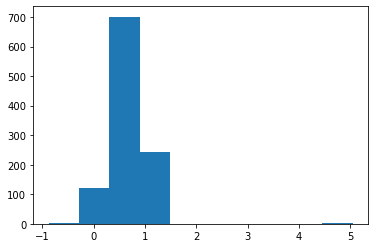

In [42]:
# x1 is the % of investments that go to transmission and distribution
investments_sales_df['pct_poles_and_wires'] = \
    (investments_sales_df['investment_value_transmission'] + \
    investments_sales_df['investment_value_distribution']) / \
    investments_sales_df['sum_investments']
x01_poles_wires_investment_pct = investments_sales_df['pct_poles_and_wires'].reset_index(drop=True)
plt.hist(x01_poles_wires_investment_pct)

**TODO: clean out data points with percentages that are negative AND those greater than 100%**

(array([10.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([1.00031702, 1.40520272, 1.81008842, 2.21497413, 2.61985983,
        3.02474553, 3.42963123, 3.83451693, 4.23940263, 4.64428833,
        5.04917403]),
 <BarContainer object of 10 artists>)

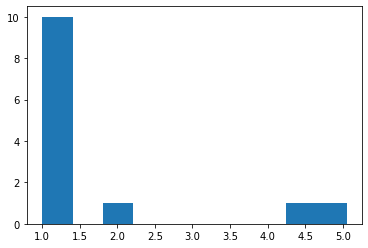

In [43]:
plt.hist(x01_poles_wires_investment_pct[x01_poles_wires_investment_pct > 1])

(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.88045896, -0.85189566, -0.82333236, -0.79476906, -0.76620576,
        -0.73764246, -0.70907916, -0.68051586, -0.65195256, -0.62338926,
        -0.59482596]),
 <BarContainer object of 10 artists>)

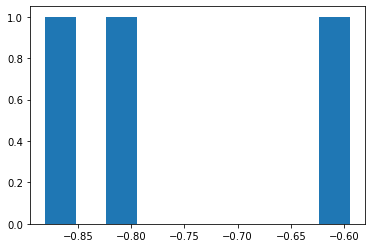

In [44]:
plt.hist(x01_poles_wires_investment_pct[x01_poles_wires_investment_pct < 0])

__x02__: % of expenditures spent on clean energy

(array([  1.,   1., 792., 241.,  30.,   4.,   1.,   0.,   0.,   1.]),
 array([-1.76314138, -1.10758789, -0.4520344 ,  0.20351909,  0.85907257,
         1.51462606,  2.17017955,  2.82573304,  3.48128653,  4.13684002,
         4.79239351]),
 <BarContainer object of 10 artists>)

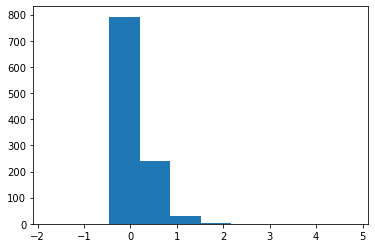

In [45]:
# x2 measures the % of expenditures for "clean" energy (renewables, nuclear, and hydro)
investments_fossil = investments_sales_df['investment_value_steam'] + investments_sales_df['investment_value_other_fossil']
investments_clean = investments_sales_df['investment_value_renewables'] + investments_sales_df['investment_value_nuclear'] + investments_sales_df['investment_value_hydro']
investments_sales_df['pct_renewable_investment'] = np.where(
    investments_sales_df['sum_investments_generation'] != 0,
    investments_clean / investments_sales_df['sum_investments_generation'], 
    0)
x02_renewables_investment_pct = investments_sales_df['pct_renewable_investment'].reset_index(drop=True)
plt.hist(x02_renewables_investment_pct)

__x03__: total investments over sales

(array([  1., 100., 596., 239.,  74.,  31.,  11.,  11.,   4.,   4.]),
 array([-67.9985635 , -23.56988429,  20.85879492,  65.28747413,
        109.71615333, 154.14483254, 198.57351175, 243.00219096,
        287.43087016, 331.85954937, 376.28822858]),
 <BarContainer object of 10 artists>)

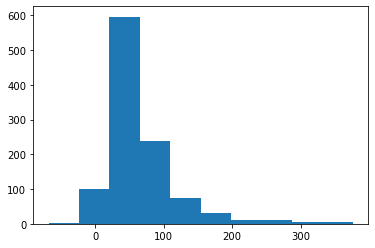

In [46]:
# x3 measures the total investments, divided by sales
investments_sales_df['total_divided_by_sales'] = investments_sales_df['sum_investments']/investments_sales_df['sales']
x03_total_investment_divided_by_sales = investments_sales_df['total_divided_by_sales'].reset_index(drop=True)
x03_total_investment_divided_by_sales[x03_total_investment_divided_by_sales>400] = x03_total_investment_divided_by_sales.median()
plt.hist(x03_total_investment_divided_by_sales)

__x04__: residential / total customers

Note, this is currently done with data from 'housing' and 'customers' columns, but could be done better with the data from customers_sales.csv


In [47]:
customer_names = ['respondent_id', 'year', 'housing_units', 'customers']
sum_customers_df = processed_df[customer_names]
                                      
sum_customers_df.head(72)

,respondent_id,year,housing_units,customers
0,2.0,2010,1232188.0,1232188.0
1,2.0,2011,1232026.0,1232026.0
2,2.0,2012,1237730.0,1237730.0
3,2.0,2013,1241998.0,1241998.0
4,2.0,2014,1247061.0,1247061.0
...,...,...,...,...
67,11.0,2014,131724.0,132036.0
68,11.0,2015,131930.0,131784.0
69,11.0,2016,132704.0,132980.0
70,11.0,2017,132585.0,132849.0


In [48]:
sum_customers_df[sum_customers_df['customers'] == 0]

,respondent_id,year,housing_units,customers
71,11.0,2018,133192.0,0.0
804,152.0,2013,63532.0,0.0


In [49]:
sum_customers_df[sum_customers_df['customers'] == 0]

,respondent_id,year,housing_units,customers
71,11.0,2018,133192.0,0.0
804,152.0,2013,63532.0,0.0


/home/julian/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


(array([   2.,    0.,    0.,    0.,   18., 1022.,   20.,    0.,    3.,
           6.]),
 array([0.        , 0.19025529, 0.38051058, 0.57076586, 0.76102115,
        0.95127644, 1.14153173, 1.33178701, 1.5220423 , 1.71229759,
        1.90255288]),
 <BarContainer object of 10 artists>)

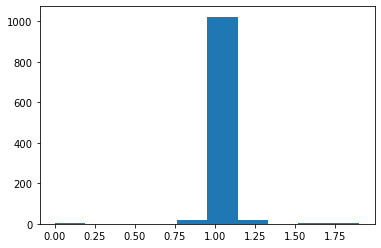

In [50]:
# handle 0 customers
def div(numerator, denominator):
  return lambda row: 0.0 if row[denominator] == 0 else float(row[numerator]/row[denominator])

sum_customers_df.loc[:, 'residential_ratio'] = sum_customers_df.apply(div('housing_units', 'customers'), axis=1)

x04_residential_customer_ratio = sum_customers_df['residential_ratio'].reset_index(drop=True)
plt.hist(x04_residential_customer_ratio)
# x04_residential_customer_ratio

__x05__: renewable / total generation (mwh)

In [51]:
gen_mwh_df

,row_uid,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,pp_mwh_fossil_fuel,pp_mwh_renewable,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,sum_total_generation,sum_generation_wo_purchased,sum_fossil_generation,sum_clean_generation
0,22010,2.0,2010,0.595833,3.707895,13.169684,10.337048,44.022450,4.793492,0.0,0,0,0,0,0,76.626402,2.208183e+04,54.359498,16.877579
1,22011,2.0,2011,0.049948,3.038090,14.431250,10.666586,39.396937,4.675221,0.0,0,0,0,0,0,72.258032,2.207858e+04,50.063523,17.469340
2,22012,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0,0,0,0,0,0,66.878757,2.207344e+04,43.948795,17.423717
3,22013,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0,0,0,0,0,0,70.259781,2.207925e+04,46.441161,19.722888
4,22014,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0,0,0,0,0,0,71.149729,2.207860e+04,46.100315,18.398345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,4282014,428.0,2014,0.000000,0.000000,0.000000,0.000016,0.356748,0.836826,0.0,0,0,0,0,0,1.193590,4.282014e+06,0.356764,0.000000
1067,4282015,428.0,2015,0.000000,0.000000,0.000000,0.000003,0.339950,0.822487,0.0,0,0,0,0,0,1.162440,4.282015e+06,0.339953,0.000000
1068,4282016,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0,0,0,0,0,0,1.072581,4.282016e+06,0.254511,0.000000
1069,4282017,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0,0,0,0,0,0,1.137573,4.282017e+06,0.349112,0.000000


(array([1026.,   34.,    2.,    0.,    0.,    0.,    0.,    0.,    4.,
           5.]),
 array([-3.80454161e-07,  8.89853013e-05,  1.78351057e-04,  2.67716812e-04,
         3.57082568e-04,  4.46448323e-04,  5.35814079e-04,  6.25179834e-04,
         7.14545590e-04,  8.03911345e-04,  8.93277101e-04]),
 <BarContainer object of 10 artists>)

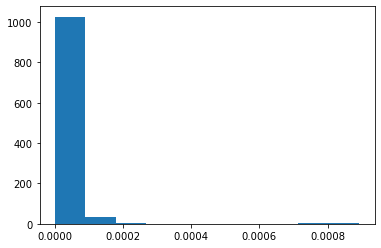

In [52]:
# handle 0 sum generation without purchased
gen_mwh_df.loc[:, 'renewable_generation_ratio'] = gen_mwh_df.apply(div('sum_clean_generation', 'sum_generation_wo_purchased'), axis=1)

x05_renewable_generation_ratio = gen_mwh_df['renewable_generation_ratio'].reset_index(drop=True)
plt.hist(x05_renewable_generation_ratio) 

In [53]:
x05_renewable_generation_ratio

0       0.000764
1       0.000791
2       0.000789
3       0.000893
4       0.000833
          ...   
1066    0.000000
1067    0.000000
1068    0.000000
1069    0.000000
1070    0.000000
Name: renewable_generation_ratio, Length: 1071, dtype: float64

In [54]:
# gen_mwh_df['renewable_generation_ratio'] = np.where(
#     gen_mwh_df['sum_generation_wo_purchased'] != 0,
#     gen_mwh_df['sum_clean_generation'] / gen_mwh_df['sum_generation_wo_purchased'],
#     0)
# x05_renewable_generation_ratio = gen_mwh_df['renewable_generation_ratio']
# plt.hist(x05_renewable_generation_ratio) 

__x06__: nuclear / clean bills ($) <font color=purple>--> deprecated</font>

In [55]:
# x6 measures the ratio of nuclear to clean bills
bills_clean = sum_bills_df['bill_renewables'] + sum_bills_df['bill_nuclear'] + sum_bills_df['bill_hydro']

x06_nuclear_renewable_bill_ratio = sum_bills_df['bill_nuclear']/bills_clean

for index, value in x06_nuclear_renewable_bill_ratio.items():
    v = x06_nuclear_renewable_bill_ratio[index]
    if np.isnan(v):
        x06_nuclear_renewable_bill_ratio[index] = 0

x06_nuclear_renewable_bill_ratio

0       0.787282
1       0.786998
2       0.804242
3       0.806518
4       0.799496
          ...   
1066    0.000000
1067    0.000000
1068    0.000000
1069    0.000000
1070    0.000000
Length: 1071, dtype: float64

__x06__: nuclear / clean generation (mwh)

(array([869.,   1.,   9.,   4.,   3.,   4.,   8.,  21.,  43., 109.]),
 array([0.        , 0.10570392, 0.21140783, 0.31711175, 0.42281567,
        0.52851959, 0.6342235 , 0.73992742, 0.84563134, 0.95133525,
        1.05703917]),
 <BarContainer object of 10 artists>)

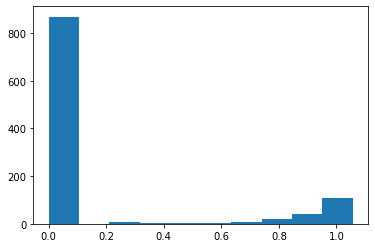

In [56]:
gen_mwh_df['nuclear_renewable_ratio'] = np.where(
    gen_mwh_df['sum_clean_generation'] != 0,
    gen_mwh_df['generation_nuclear'] / gen_mwh_df['sum_clean_generation'],
    0)
x06_nuclear_renewable_mwh_ratio = gen_mwh_df['nuclear_renewable_ratio'].reset_index(drop=True)
plt.hist(x06_nuclear_renewable_mwh_ratio)

__x07__: hydro / clean bills ($) <font color=purple>--> deprecated</font>

In [57]:
# x07 measures the ratio of hydro to clean bills

x07_hydro_renewable_ratio = sum_bills_df['bill_hydro']/bills_clean

for index, value in x07_hydro_renewable_ratio.items():
    v = x07_hydro_renewable_ratio[index]
    if np.isnan(v):
        x07_hydro_renewable_ratio[index] = 0

x07_hydro_renewable_ratio

0       0.212718
1       0.213002
2       0.195758
3       0.193482
4       0.200504
          ...   
1066    0.000000
1067    0.000000
1068    0.000000
1069    0.000000
1070    0.000000
Length: 1071, dtype: float64

__x07__: hydro / clean generation (mwh)

(array([  1.,   0., 849., 218.,   0.,   0.,   1.,   0.,   0.,   2.]),
 array([-2.91676364, -1.79385695, -0.67095027,  0.45195642,  1.57486311,
         2.69776979,  3.82067648,  4.94358316,  6.06648985,  7.18939654,
         8.31230322]),
 <BarContainer object of 10 artists>)

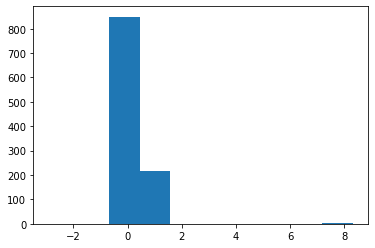

In [58]:
gen_mwh_df['hydro_renewable_ratio'] = np.where(
    gen_mwh_df['sum_clean_generation'] != 0,
    gen_mwh_df['generation_hydro'] / gen_mwh_df['sum_clean_generation'],
    0)
x07_hydro_renewable_mwh_ratio = gen_mwh_df['hydro_renewable_ratio'].reset_index(drop=True)
plt.hist(x07_hydro_renewable_mwh_ratio)

In [59]:
# looks like there are some negative values under the `generation_renewables_and_storage` column (used in the sum for the `sum_clean_generation` column)
# resulting in some of the values for this hydro/clean generation feature to be outside bounds of 0-1 (ie. 0-100%)
gen_mwh_df[gen_mwh_df['generation_hydro'] > gen_mwh_df['sum_clean_generation']]

,row_uid,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,...,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,sum_total_generation,sum_generation_wo_purchased,sum_fossil_generation,sum_clean_generation,renewable_generation_ratio,nuclear_renewable_ratio,hydro_renewable_ratio
26,62018,6.0,2018,0.354175,0.756353,0.0,4.385579,19.258285,12.407175,-0.000210,...,0,0,0,37.161357,6.204275e+04,23.643864,0.756143,1.218745e-05,0.0,1.000278
114,272016,27.0,2016,0.790893,0.000000,0.0,0.000119,5.498224,6.172428,-0.053992,...,0,0,0,12.407672,2.720222e+05,5.498343,-0.053992,-1.984838e-07,-0.0,-0.000000
115,272017,27.0,2017,0.947813,0.000000,0.0,0.000000,0.000000,5.475918,-0.001191,...,0,0,0,6.422540,2.720179e+05,0.000000,-0.001191,-4.378388e-09,-0.0,-0.000000
116,272018,27.0,2018,1.071826,0.000000,0.0,0.000000,0.000000,5.449337,-0.001285,...,0,0,0,6.519878,2.720191e+05,0.000000,-0.001285,-4.723934e-09,-0.0,-0.000000
611,1272018,127.0,2018,0.000000,0.000000,0.0,0.000000,0.000000,15.894138,-0.001278,...,0,0,0,15.892860,1.272018e+06,0.000000,-0.001278,-1.004703e-09,-0.0,-0.000000


__x08__: regulatory environment (rps targets)

from 2018 (instead of 2020 used previously)

In [60]:
rps_mean = processed_df.groupby(['respondent_id']).agg({'rps_score': ['mean']}).reset_index()
rps_mean = rps_mean.droplevel(1, axis=1)  #drop the 2nd column header labeled 'mean'
rps_mean

,respondent_id,rps_score
0,2.0,0.000000
1,3.0,0.000000
2,6.0,10.499625
3,7.0,14.612634
4,8.0,0.000000
...,...,...
111,281.0,0.764927
112,288.0,11.250000
113,290.0,0.000000
114,403.0,0.000000


In [61]:
processed_df_with_rps = pd.merge(processed_df, \
                                 rps_mean, \
                                 how="left", \
                                 on=["respondent_id"])
processed_df_with_rps

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,roe,pp_mwh_fossil_fuel,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,pp_mwh_renewable,energy_burden,normalized_expenditure,row_uid,rps_score_y
0,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,0.105000,0.0,0.0,0.0,0.0,0.0,0.033783,111.838989,22010,0.0
1,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,0.104333,0.0,0.0,0.0,0.0,0.0,0.031261,114.943218,22011,0.0
2,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,0.103250,0.0,0.0,0.0,0.0,0.0,0.029887,117.445000,22012,0.0
3,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,0.102500,0.0,0.0,0.0,0.0,0.0,0.028994,115.989436,22013,0.0
4,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,0.101400,0.0,0.0,0.0,0.0,0.0,0.030413,117.954902,22014,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,428.0,2014,158.113482,555.291597,-126.117586,203.376168,0.000000,0.000000,197.721946,0.000000,...,0.119000,0.0,0.0,0.0,0.0,0.0,0.022694,128.591665,4282014,0.0
1067,428.0,2015,143.199850,384.308423,-112.101241,201.287076,0.000000,0.000000,194.074933,0.000000,...,0.119000,0.0,0.0,0.0,0.0,0.0,0.019192,117.336134,4282015,0.0
1068,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.119000,0.0,0.0,0.0,0.0,0.0,0.018758,111.441490,4282016,0.0
1069,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.119000,0.0,0.0,0.0,0.0,0.0,0.015613,106.074202,4282017,0.0


(array([522., 234., 126.,  36.,  18.,   9.,  63.,   0.,  45.,  18.]),
 array([ 0. ,  5.6, 11.2, 16.8, 22.4, 28. , 33.6, 39.2, 44.8, 50.4, 56. ]),
 <BarContainer object of 10 artists>)

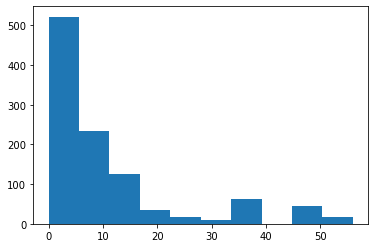

In [62]:
x08_regulatory_rps_target = processed_df_with_rps['rps_score_y']
plt.hist(x08_regulatory_rps_target)

__x09__: regulated rate of return by utility

In [63]:
processed_df_with_utility_type = pd.merge(processed_df, \
                                              utility_info_df, \
                                              how="left", \
                                              on=["respondent_id"])
processed_df_with_utility_type

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,pp_mwh_fossil_fuel,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,pp_mwh_renewable,energy_burden,normalized_expenditure,row_uid,utype_y,roe_y
0,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,0.0,0.0,0.0,0.0,0.0,0.033783,111.838989,22010,vert_int,0.105
1,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,0.0,0.0,0.0,0.0,0.0,0.031261,114.943218,22011,vert_int,0.105
2,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,0.0,0.0,0.0,0.0,0.0,0.029887,117.445000,22012,vert_int,0.105
3,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,0.0,0.0,0.0,0.0,0.0,0.028994,115.989436,22013,vert_int,0.105
4,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,0.0,0.0,0.0,0.0,0.0,0.030413,117.954902,22014,vert_int,0.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,428.0,2014,158.113482,555.291597,-126.117586,203.376168,0.000000,0.000000,197.721946,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.022694,128.591665,4282014,other_wires,0.119
1067,428.0,2015,143.199850,384.308423,-112.101241,201.287076,0.000000,0.000000,194.074933,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.019192,117.336134,4282015,other_wires,0.119
1068,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.018758,111.441490,4282016,other_wires,0.119
1069,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.015613,106.074202,4282017,other_wires,0.119


(array([  9.,   0.,   0.,   0.,   0.,   9., 378., 612.,  54.,   9.]),
 array([0.        , 0.01477472, 0.02954945, 0.04432417, 0.05909889,
        0.07387362, 0.08864834, 0.10342306, 0.11819778, 0.13297251,
        0.14774723]),
 <BarContainer object of 10 artists>)

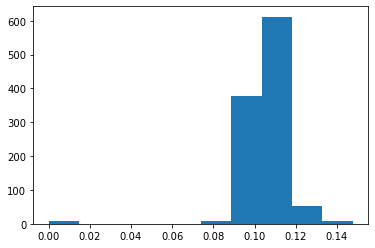

In [64]:
x09_regulated_rate_of_return = processed_df_with_utility_type['roe_y']
plt.hist(x09_regulated_rate_of_return)

__c10__: utility type (veritcally integrated, poles and wires only, etc.)

(array([657.,   0.,   0., 279.,   0.,   0., 126.,   0.,   0.,   9.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

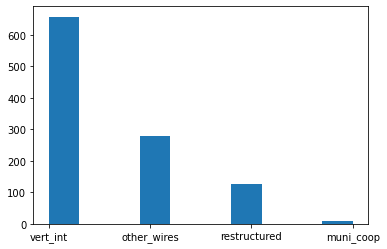

In [65]:
c10_utility_type = processed_df_with_utility_type['utype_y']
plt.hist(c10_utility_type)

**Consolidate feature variables into model_data table**

In [66]:
model_data = pd.DataFrame(
    {
        'target': target, 
        'x01': x01_poles_wires_investment_pct,
        'x02': x02_renewables_investment_pct,
        'x03': x03_total_investment_divided_by_sales,
        'x04': x04_residential_customer_ratio,
        'x05': x05_renewable_generation_ratio,
        'x06': x06_nuclear_renewable_mwh_ratio,
        'x07': x07_hydro_renewable_mwh_ratio,
        'x08': x08_regulatory_rps_target,
        'x09': x09_regulated_rate_of_return,
        'c10': c10_utility_type,
    }
)
model_data

,target,x01,x02,x03,x04,x05,x06,x07,x08,x09,c10
0,0.024761,0.277673,0.074652,76.268450,1.000000,0.000764,0.780306,0.219694,0.0,0.105,vert_int
1,0.004686,0.535174,0.340114,56.872832,1.000000,0.000791,0.826090,0.173910,0.0,0.105,vert_int
2,0.002276,0.590562,0.256538,39.581972,1.000000,0.000789,0.847292,0.152708,0.0,0.105,vert_int
3,0.025767,0.532942,0.190320,48.594641,1.000000,0.000893,0.714805,0.285195,0.0,0.105,vert_int
4,0.035918,0.544757,0.132016,63.100622,1.000000,0.000833,0.788407,0.211593,0.0,0.105,vert_int
...,...,...,...,...,...,...,...,...,...,...,...
1066,-0.068883,0.932067,0.000000,13.963864,1.000184,0.000000,0.000000,0.000000,0.0,0.119,other_wires
1067,-0.049200,0.968892,0.000000,13.343040,0.999705,0.000000,0.000000,0.000000,0.0,0.119,other_wires
1068,0.012818,0.967203,0.000000,15.391979,1.019307,0.000000,0.000000,0.000000,0.0,0.119,other_wires
1069,-0.463100,0.982521,0.000000,25.569884,1.017807,0.000000,0.000000,0.000000,0.0,0.119,other_wires


Filter out target outliers and nan

In [67]:
model_data[model_data['target'] > 10]

,target,x01,x02,x03,x04,x05,x06,x07,x08,x09,c10
97,11118.145112,0.592165,0.0,39.818659,0.986520,0.0,0.0,0.0,0.0,0.107,vert_int
98,11118.094905,0.543915,0.0,39.252354,0.986356,0.0,0.0,0.0,0.0,0.107,vert_int
700,329.363895,0.720068,0.0,0.016800,1.000000,0.0,0.0,0.0,0.0,0.105,other_wires
701,329.439658,0.963772,0.0,0.021960,0.939323,0.0,0.0,0.0,0.0,0.105,other_wires


In [68]:
model_data[model_data['target'].isnull()]

,target,x01,x02,x03,x04,x05,x06,x07,x08,x09,c10
1070,NaN,0.94964,0.0,19.354915,1.017675,0.0,0.0,0.0,0.0,0.119,other_wires


In [69]:
model_data = model_data[model_data['target'] <= 10]
model_data = model_data.dropna()
model_data.shape

(1066, 11)

#### Check for covariance

In [70]:
# import seaborn as sns
# sns.pairplot(model_data.drop(columns=['target']))

In [71]:
corr = model_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,target,x01,x02,x03,x04,x05,x06,x07,x08,x09
target,1.000000,-0.059754,0.043273,-0.014814,-0.034484,0.019581,0.034569,0.025759,-0.031164,0.028254
x01,-0.059754,1.000000,-0.184488,-0.395172,0.092416,-0.123694,-0.230403,-0.093060,0.071141,-0.074663
x02,0.043273,-0.184488,1.000000,0.196940,-0.018447,0.073602,0.349220,0.130323,0.230739,0.015567
x03,-0.014814,-0.395172,0.196940,1.000000,-0.034735,0.050538,0.178650,0.032132,0.157108,-0.003482
x04,-0.034484,0.092416,-0.018447,-0.034735,1.000000,-0.014677,-0.037887,-0.001274,0.018156,-0.016263
x05,0.019581,-0.123694,0.073602,0.050538,-0.014677,1.000000,0.338096,-0.028233,-0.068861,0.004722
x06,0.034569,-0.230403,0.349220,0.178650,-0.037887,0.338096,1.000000,-0.161615,0.171228,0.064694
x07,0.025759,-0.093060,0.130323,0.032132,-0.001274,-0.028233,-0.161615,1.000000,0.194684,-0.125778
x08,-0.031164,0.071141,0.230739,0.157108,0.018156,-0.068861,0.171228,0.194684,1.000000,0.004374
x09,0.028254,-0.074663,0.015567,-0.003482,-0.016263,0.004722,0.064694,-0.125778,0.004374,1.000000


#### Save model_data file

In [72]:
output_dir = os.path.join('..', 'data', 'processed', 'model_v2')

In [73]:
model_data.to_csv(os.path.join(output_dir, 'model_data_v2.csv'), index=False)